In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import tensorflow as tf
import numpy as np
import os

# plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
nbatch = 128

train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=10.,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                  )

test_datagen  = ImageDataGenerator( rescale=1./255 )

train_gen = train_datagen.flow_from_directory(
        '../input/newhanddata/images/train/',
        target_size=(300, 300),
        color_mode='grayscale',
        batch_size=nbatch,
        classes=['NONE','ONE','TWO','THREE','FOUR','FIVE'],
        class_mode='categorical'
    )

test_gen = test_datagen.flow_from_directory(
        '../input/newhanddata/images/test/',
        target_size=(300, 300),
        color_mode='grayscale',
        batch_size=nbatch,
        classes=['NONE','ONE','TWO','THREE','FOUR','FIVE'],
        class_mode='categorical'
    )

Found 9081 images belonging to 6 classes.
Found 3632 images belonging to 6 classes.


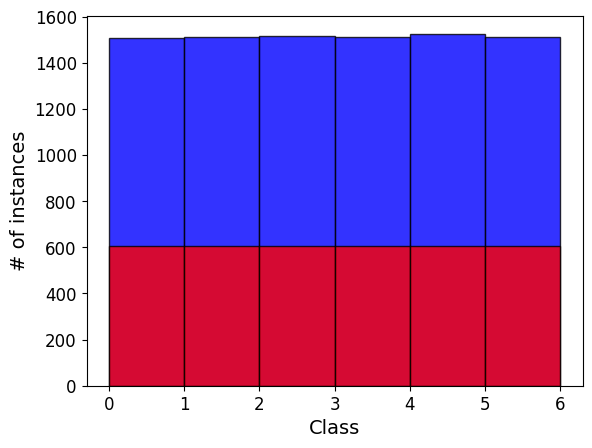

In [3]:
h1,_,_ = plt.hist(train_gen.classes, bins=range(0,7), alpha=0.8, color='blue', edgecolor='black')
h2,_,_ = plt.hist(test_gen.classes,  bins=range(0,7), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class');

In [4]:
train_gen.class_indices == test_gen.class_indices

True

(128, 300, 300, 1) (128, 6)


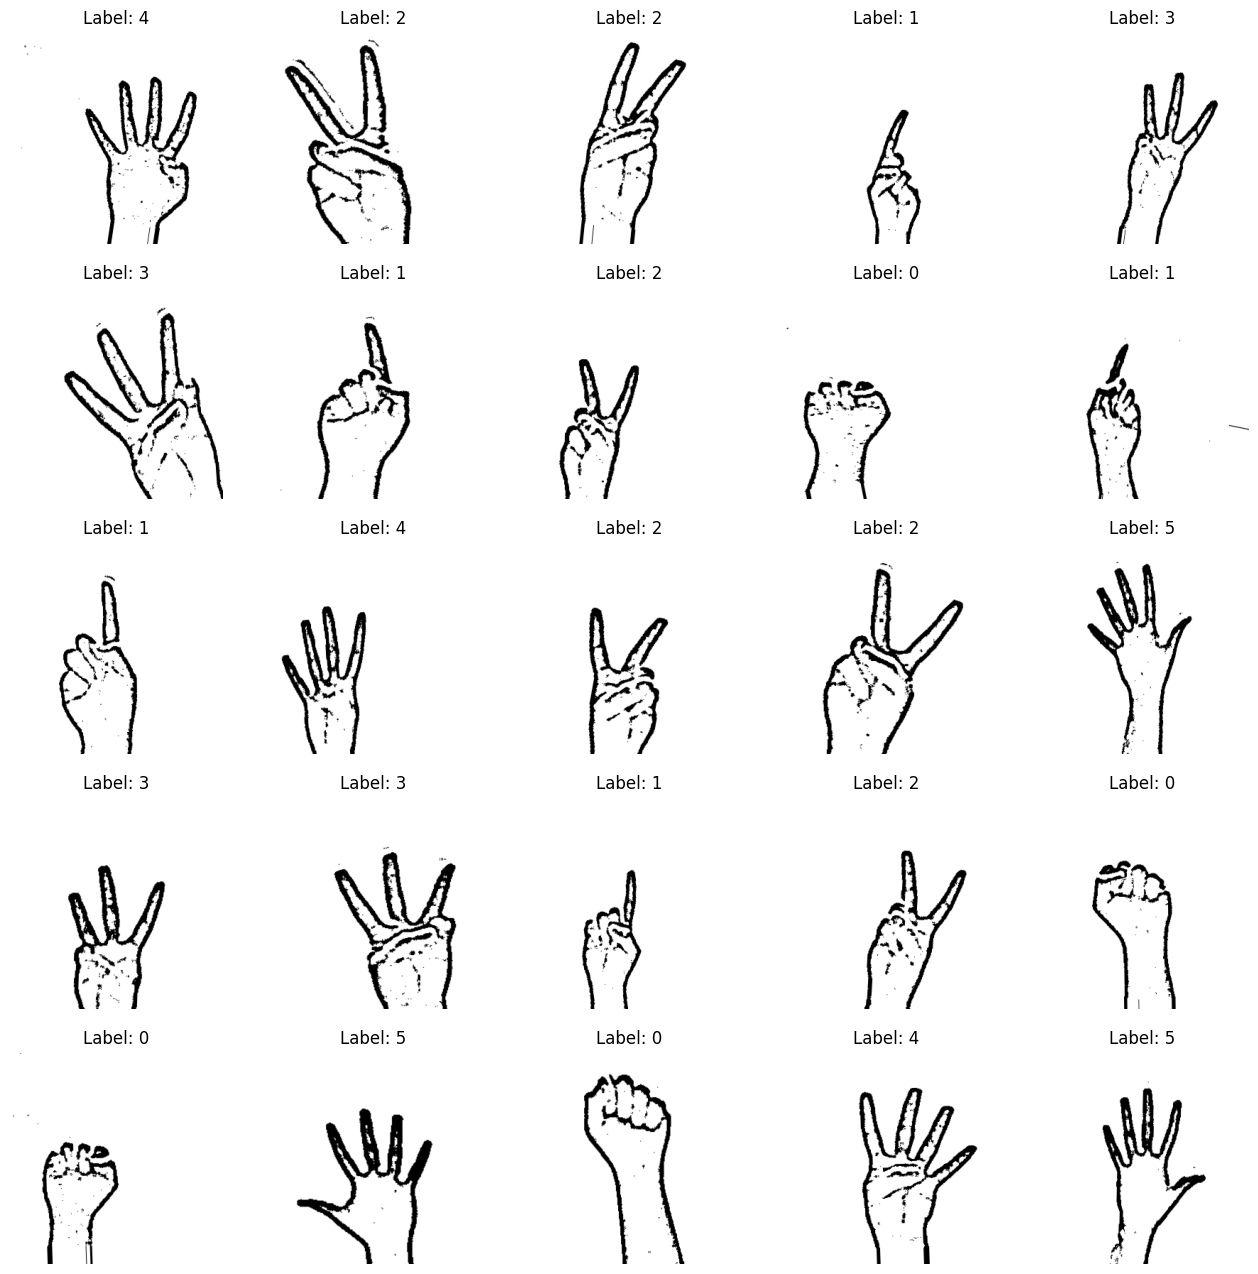

In [5]:
for X, y in train_gen:
    print(X.shape, y.shape)
    
    plt.figure(figsize=(16,16))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.axis('off')
        plt.title('Label: %d' % np.argmax(y[i]))
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

In [30]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300,300,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

# New layers added for more depth
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

# More neurons in the dense layer
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 298, 298, 32)      320       
                                                                 
 batch_normalization_36 (Ba  (None, 298, 298, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 149, 149, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 batch_normalization_37 (Ba  (None, 147, 147, 64)      256       
 tchNormalization)                                               
                                                      

In [31]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

In [32]:

callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_6cat.h5', monitor='val_loss', save_best_only=True),
]

In [33]:

history = model.fit_generator(
        train_gen,
        steps_per_epoch=71,
        epochs=90,
        validation_data=test_gen,
        validation_steps=28,
        callbacks=callbacks_list
    )

/tmp/ipykernel_42/1920510789.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/90
71/71 [==============================] - 89s 1s/step - loss: 2.8804 - acc: 0.1887 - val_loss: 2.1153 - val_acc: 0.1677
Epoch 2/90
71/71 [==============================] - 85s 1s/step - loss: 2.4611 - acc: 0.2620 - val_loss: 2.7861 - val_acc: 0.1677
Epoch 3/90
71/71 [==============================] - 85s 1s/step - loss: 2.2322 - acc: 0.3131 - val_loss: 3.3398 - val_acc: 0.1657
Epoch 4/90
71/71 [==============================] - 85s 1s/step - loss: 2.0661 - acc: 0.3402 - val_loss: 3.3899 - val_acc: 0.1722
Epoch 5/90
71/71 [==============================] - 85s 1s/step - loss: 1.9182 - acc: 0.3815 - val_loss: 2.8757 - val_acc: 0.1920
Epoch 6/90
71/71 [==============================] - 86s 1s/step - loss: 1.8219 - acc: 0.4155 - val_loss: 2.0751 - val_acc: 0.2573
Epoch 7/90
71/71 [==============================] - 87s 1s/step - loss: 1.7319 - acc: 0.4348 - val_loss: 1.3984 - val_acc: 0.4434
Epoch 8/90
71/71 [==============================] - 85s 1s/step - loss: 1.6805 - acc: 0.45

Text(0.5, 0, '# of epochs')

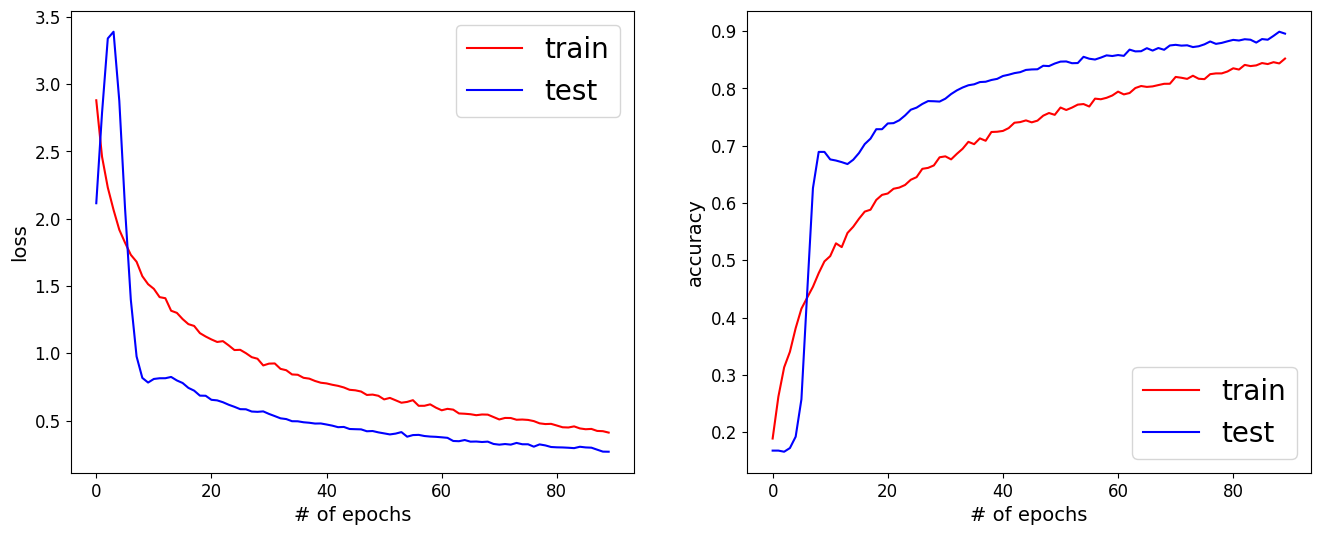

In [34]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['acc'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [35]:
test_datagen  = ImageDataGenerator( rescale=1./255, 
                                    rotation_range=10.,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                  )

test_gen = test_datagen.flow_from_directory(
        '/kaggle/input/newhanddata/images/test',
        target_size=(300, 300),
        color_mode='grayscale',
        batch_size=nbatch,
        classes=['NONE','ONE','TWO','THREE','FOUR','FIVE'],
        class_mode='categorical'
    )

Found 3632 images belonging to 6 classes.


In [ ]:
X_test, y_test = [], []
for ibatch, (X, y) in enumerate(test_gen):
    X_test.append(X)
    y_test.append(y)
    ibatch += 1
    if (ibatch == 5*28): break

# Concatenate everything together
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)
y_test = np.int32([np.argmax(r) for r in y_test])

# Get the predictions from the model and calculate the accuracy
y_pred = np.int32([np.argmax(r) for r in model.predict(X_test)])
match = (y_test == y_pred)
print('Testing Accuracy = %.2f%%' % (np.sum(match)*100/match.shape[0]))

In [ ]:
nomatch = (y_test != y_pred)
bad_pred = y_pred[nomatch]
bad_true = y_test[nomatch]
bad_img = X_test[nomatch]
print('%d examples of bad predictions' % bad_pred.size)

In [ ]:

plt.figure(figsize=(15,15))
for i in range(min(bad_true.size,25)):
    plt.subplot(5,5,i+1)
    i+=75
    plt.title('Pred: %d (Truth: %d)' % (bad_pred[i], bad_true[i]))
    plt.axis('off')
    plt.imshow(bad_img[i][:,:,0], cmap='gray')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
plt.figure(figsize=(9,8))
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum(axis=1)
sn.heatmap(cm, annot=True);

In [37]:
model.save('model3.h5') 

In [38]:
from IPython.display import FileLink
FileLink('model3.h5')

/kaggle/working/model3.h5